In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Concatenate
from tensorflow import keras
import tensorflow as tf
import pickle
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd

In [20]:
TRAIN_SET = './ptb_train_set.pickle'
TEST_SET = './ptb_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)
x_train.shape

TensorShape([13097, 187, 1])

In [21]:
CNN_model  = keras.models.load_model('CNN_REP')
LSTM_model = keras.models.load_model('LSTM_REP')
MLP_model  = keras.models.load_model('MLP_REP')

In [22]:
CNN = Model(inputs=CNN_model.input, outputs=CNN_model.layers[-9].output)
LSTM = Model(inputs=LSTM_model.input, outputs=LSTM_model.layers[-9].output)
MLP = Model(inputs=MLP_model.input, outputs=MLP_model.layers[-9].output)

In [23]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

CNN.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [24]:
history_CNN = CNN.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 2s 8ms/step - loss: 1.1237 - accuracy: 0.6719 - val_loss: 0.3271 - val_accuracy: 0.8674
Epoch 2/20
205/205 [==============================] - 1s 7ms/step - loss: 0.3108 - accuracy: 0.8693 - val_loss: 0.2571 - val_accuracy: 0.9100
Epoch 3/20
205/205 [==============================] - 1s 7ms/step - loss: 0.2445 - accuracy: 0.9053 - val_loss: 0.2259 - val_accuracy: 0.9175
Epoch 4/20
205/205 [==============================] - 1s 7ms/step - loss: 0.2014 - accuracy: 0.9266 - val_loss: 0.2220 - val_accuracy: 0.9072
Epoch 5/20
205/205 [==============================] - 1s 7ms/step - loss: 0.1751 - accuracy: 0.9348 - val_loss: 0.1632 - val_accuracy: 0.9395
Epoch 6/20
205/205 [==============================] - 1s 7ms/step - loss: 0.1505 - accuracy: 0.9430 - val_loss: 0.1489 - val_accuracy: 0.9423
Epoch 7/20
205/205 [==============================] - 2s 7ms/step - loss: 0.1308 - accuracy: 0.9501 - val_loss: 0.1364 - val_accuracy: 0.9464
Epoch 

In [25]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

LSTM.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
history_LSTM = LSTM.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 16s 70ms/step - loss: 0.4558 - accuracy: 0.7603 - val_loss: 0.3257 - val_accuracy: 0.8577
Epoch 2/20
205/205 [==============================] - 14s 69ms/step - loss: 0.3214 - accuracy: 0.8573 - val_loss: 0.3131 - val_accuracy: 0.8447
Epoch 3/20
205/205 [==============================] - 14s 67ms/step - loss: 0.2704 - accuracy: 0.8831 - val_loss: 0.2364 - val_accuracy: 0.9017
Epoch 4/20
205/205 [==============================] - 13s 62ms/step - loss: 0.2353 - accuracy: 0.8997 - val_loss: 0.2227 - val_accuracy: 0.9086
Epoch 5/20
205/205 [==============================] - 13s 64ms/step - loss: 0.2224 - accuracy: 0.9121 - val_loss: 0.2084 - val_accuracy: 0.9141
Epoch 6/20
205/205 [==============================] - 15s 71ms/step - loss: 0.1866 - accuracy: 0.9290 - val_loss: 0.1944 - val_accuracy: 0.9244
Epoch 7/20
205/205 [==============================] - 15s 72ms/step - loss: 0.1842 - accuracy: 0.9265 - val_loss: 0.1897 - val_accuracy:

In [27]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

MLP.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [28]:
history_MLP = MLP.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 12s 55ms/step - loss: 4.6652 - accuracy: 0.5447 - val_loss: 0.4169 - val_accuracy: 0.8076
Epoch 2/20
205/205 [==============================] - 11s 54ms/step - loss: 0.3955 - accuracy: 0.8099 - val_loss: 0.3696 - val_accuracy: 0.8289
Epoch 3/20
205/205 [==============================] - 11s 54ms/step - loss: 0.3566 - accuracy: 0.8366 - val_loss: 0.3469 - val_accuracy: 0.8289
Epoch 4/20
205/205 [==============================] - 11s 54ms/step - loss: 0.3324 - accuracy: 0.8512 - val_loss: 0.3378 - val_accuracy: 0.8495
Epoch 5/20
205/205 [==============================] - 11s 54ms/step - loss: 0.3271 - accuracy: 0.8527 - val_loss: 0.3452 - val_accuracy: 0.8268
Epoch 6/20
205/205 [==============================] - 11s 54ms/step - loss: 0.3197 - accuracy: 0.8598 - val_loss: 0.3436 - val_accuracy: 0.8433
Epoch 7/20
205/205 [==============================] - 11s 54ms/step - loss: 0.3066 - accuracy: 0.8644 - val_loss: 0.3069 - val_accuracy:

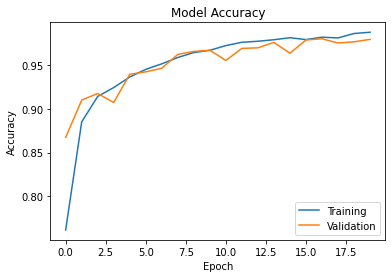

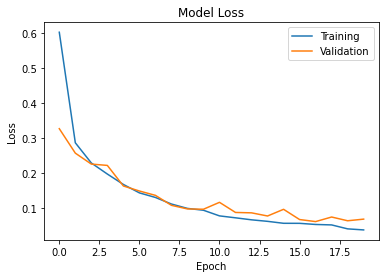

In [32]:
fig1, ax_acc = plt.subplots()
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
    
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


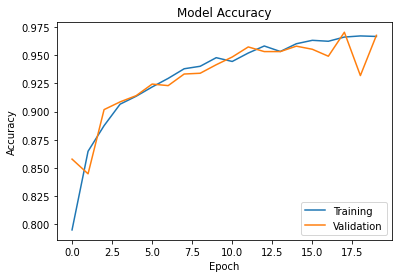

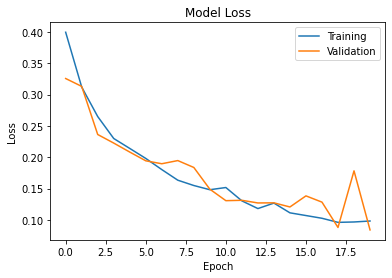

In [31]:
fig1, ax_acc = plt.subplots()
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
    
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


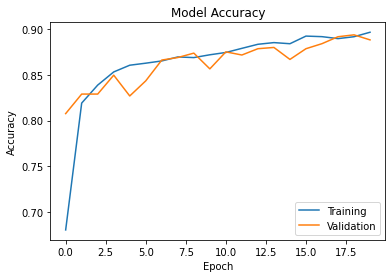

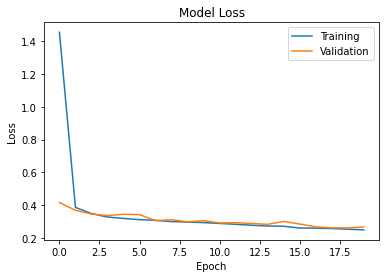

In [30]:
fig1, ax_acc = plt.subplots()
plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
    
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [33]:
CNN.save("CNN_REP_PTB")
LSTM.save("LSTM_REP_PTB")
MLP.save("MLP_REP_PTB")

INFO:tensorflow:Assets written to: CNN_REP_PTB\assets


INFO:tensorflow:Assets written to: LSTM_REP_PTB\assets


INFO:tensorflow:Assets written to: LSTM_REP_PTB\assets


INFO:tensorflow:Assets written to: MLP_REP_PTB\assets


INFO:tensorflow:Assets written to: MLP_REP_PTB\assets


In [ ]:
"""
model = keras.models.load_model('self_model')
model2= Model(inputs=model.input, outputs=model.layers[-9].output)
model.layers[-9]
class SelfSupervisedModel():
    def assemble(self, input_shape, model):
        inputs = Input(shape=input_shape)

        x = model(inputs)
        model.trainable = False
        
        y = Dense(1, activation="sigmoid")(x)
        
        model = Model(inputs = inputs, outputs = y)
        return model

t_model = SelfSupervisedModel().assemble(x_train.shape[1:], model2)
t_model.summary()
"""